In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt
import os

In [6]:
#actual path
fileDir = os.path.dirname(os.path.realpath('__file__'))
print (fileDir)
#correct path
rating_file = os.path.join(fileDir, '../data/ratings.csv')
print(rating_file)

/Users/Kelvin/Github/Hybrid_movie_recommender/src
/Users/Kelvin/Github/Hybrid_movie_recommender/src/../data/ratings.csv


In [7]:
#unnecesary
rating_file = os.path.abspath(os.path.realpath(rating_file))
print(rating_file)

/Users/Kelvin/Github/Hybrid_movie_recommender/data/ratings.csv


## Ratings dataset

In [8]:
data = pd.read_csv(rating_file)
print('shape: ', data.shape)

shape:  (27753444, 4)


In [73]:
data.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


## 1. Outliers

There are some people that review a large number of times

In [10]:
x = data['userId'].value_counts();

In [11]:
users = x.index[:]
counts = x.iloc[:]

In [18]:
counts

123100    23715
117490     9279
134596     8381
212343     7884
242683     7515
          ...  
244681        1
69163         1
203079        1
184554        1
35319         1
Name: userId, Length: 283228, dtype: int64

In [12]:
print('There are {} unique number of reviewers'.format(users.shape))

There are (283228,) unique number of reviewers


In [16]:
#filter out people with 2 standard deviations away from the mean rating per person
def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

In [17]:
filtered = reject_outliers(counts, m= 2)
reject_outliers(counts, m= 2)[:10]

64857     523
42018     523
40282     523
205042    523
170942    523
66412     523
109957    523
199247    523
65459     523
181264    523
Name: userId, dtype: int64

In [19]:
filtered.shape

(273780,)

## Distribution of ratings per reviewer

The majority of reviewers have lessthan 200 reviews

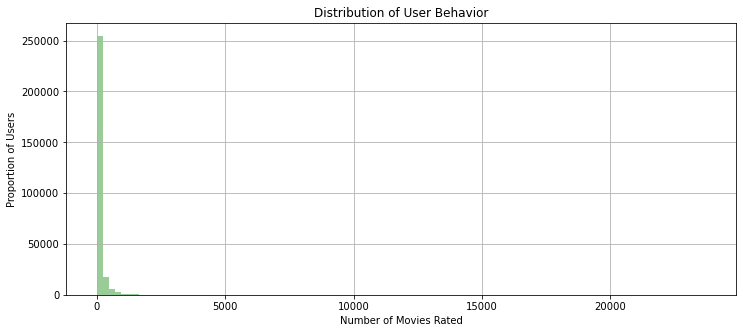

In [20]:
plt.figure(figsize=(12,5))
sns.distplot(counts, 100, kde=False, color='g')
plt.xlabel('Number of Movies Rated')
plt.ylabel('Proportion of Users')
plt.title('Distribution of User Behavior')
#plt.axis([10, 100])
plt.grid(True)
plt.show()

In [21]:
print('No. of Outliers ( users that have rated abnormally high number of movies): ',len(counts)-len(filtered))

No. of Outliers ( users that have rated abnormally high number of movies):  9448


### Harder Threshold

Filter reviewers with more than 100 and less than 10 reviews

In [22]:
def hard_threshold(data):
    data = data[data < 100]
    return data[data > 10]

In [23]:
filtered_2 = hard_threshold(counts)

In [24]:
filtered_2.shape

(168316,)

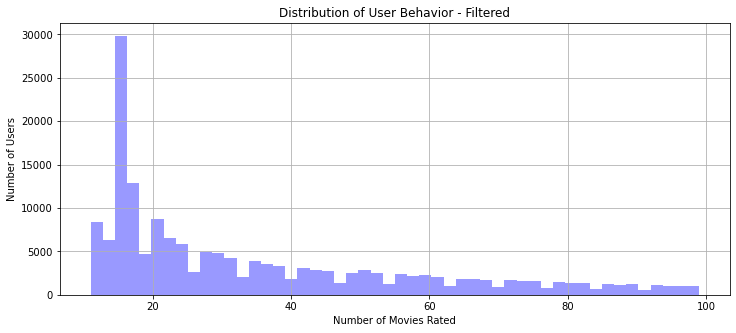

In [25]:
plt.figure(figsize=(12,5))
# plt.hist(filtered_2, 50, density=False, facecolor='g', alpha=0.75)
sns.distplot(filtered_2, 50, kde=False, color='blue')
plt.xlabel('Number of Movies Rated')
plt.ylabel('Number of Users')
plt.title('Distribution of User Behavior - Filtered')
#plt.axis([10, 100])
plt.grid(True)
plt.show()

## 2. Distribution Pattern in Ratings

In [26]:
y = data['rating'].value_counts()

In [27]:
y

4.0    7394710
3.0    5515668
5.0    4071135
3.5    3404360
4.5    2373550
2.0    1850627
2.5    1373419
1.0     886233
0.5     442388
1.5     441354
Name: rating, dtype: int64

In [28]:
ratings = y.iloc[:]
rcounts = y.index[:]

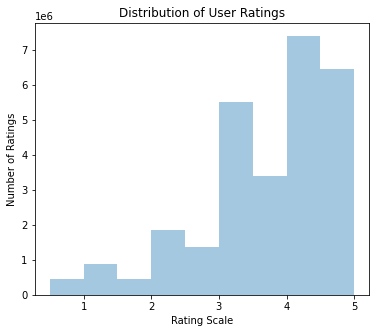

In [29]:
plt.figure(figsize=(6,5))
sns.distplot(data['rating'], 9, kde=False )
# plt.hist(data['rating'], 9, density=False, facecolor='b', alpha=0.75, histtype ='bar')
plt.xlabel('Rating Scale')
plt.ylabel('Number of Ratings')
plt.title('Distribution of User Ratings')
plt.show()

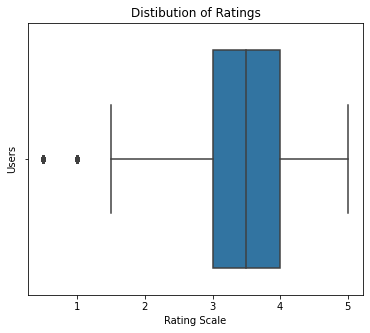

In [30]:
plt.figure(figsize=(6,5))
sns.boxplot(data['rating'])
plt.ylabel('Users')
plt.xlabel('Rating Scale')
plt.title('Distibution of Ratings')
plt.show()

## 3. Number of Ratings collected over the Years

In [31]:
date = list()
for i in tqdm(data['timestamp']):
    date.append(datetime.datetime.fromtimestamp(i).strftime('%Y'))

100%|██████████| 27753444/27753444 [01:46<00:00, 260413.64it/s]


In [32]:
data['ratedYear'] = date

In [33]:
data.head()

,userId,movieId,rating,timestamp,ratedYear
0,1,307,3.5,1256677221,2009
1,1,481,3.5,1256677456,2009
2,1,1091,1.5,1256677471,2009
3,1,1257,4.5,1256677460,2009
4,1,1449,4.5,1256677264,2009


In [34]:
z = data['ratedYear'].value_counts()

In [35]:
ycounts = z.iloc[:]
years = z.index[:]

In [36]:
df = pd.DataFrame({'Year':years,'counts':ycounts})

In [37]:
df.reset_index(drop =True)
df.sort_values(by=['Year'],inplace = True)

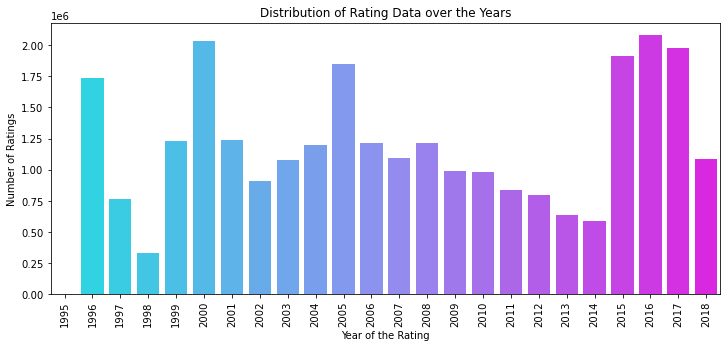

In [38]:
plt.figure(figsize=(12,5))
sns.barplot(df.Year, df.counts, palette='cool' )
plt.xticks(rotation = 90)
plt.xlabel('Year of the Rating')
plt.ylabel('Number of Ratings')
plt.title('Distribution of Rating Data over the Years')
plt.show()

The last four years have seen an increase in ratings

## 4. Lifespan of Average Reviewer on the Movielens Data? 

In [39]:
df1 = data.groupby('ratedYear').rating.agg("mean")

In [ ]:
df2 = data.groupby('userId').ratedYear.agg(["min","max"])
df2

In [113]:
xx= np.asarray(df2['max'].iloc[:])
yy= np.asarray(df2['min'].iloc[:])

In [114]:
value = list()
for i in range(len(df2)):
    v = int(df2['max'].iloc[i])-int(df2['min'].iloc[i])
    value.append(v)

In [115]:
lifespan = Counter(value)

In [116]:
lifespan.keys()

dict_keys([0, 3, 2, 7, 4, 1, 6, 5, 17, 12, 8, 13, 11, 9, 15, 10, 14, 18, 20, 16, 19, 21])

In [117]:
l1,l2 = [],[]

for i,j in lifespan.items():
    l1.append(i)
    l2.append(np.log(j))

In [118]:
l1

[0, 3, 2, 7, 4, 1, 6, 5, 17, 12, 8, 13, 11, 9, 15, 10, 14, 18, 20, 16, 19, 21]

In [119]:
dff = pd.DataFrame({'Span':l1, 'Counts':l2})

In [120]:
dff.sort_values(by=['Span'], inplace = True)
dff.reset_index(drop=True, inplace = True)

In [121]:
dff.columns

Index(['Span', 'Counts'], dtype='object')

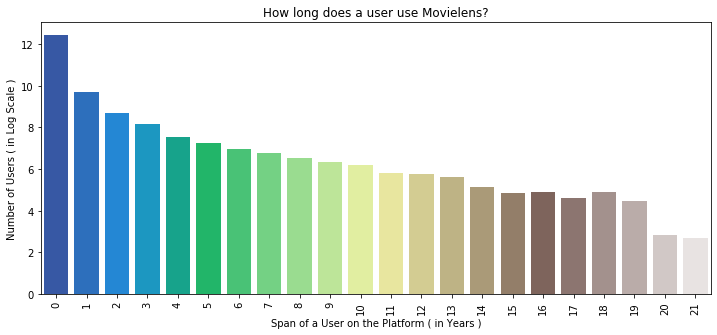

In [122]:
plt.figure(figsize=(12,5))
# plt.bar(dff.Span, dff.Counts )
sns.barplot(dff.Span, dff.Counts, palette='terrain')
plt.xticks(rotation = 90)
plt.xlabel('Span of a User on the Platform ( in Years )')
plt.ylabel('Number of Users ( in Log Scale )')
plt.title('How long does a user use Movielens?')
plt.show()